# Lipophilicity Prediction

## Dataset Loading

In [1]:
#enable data manipulation
import pandas as pd

In [2]:
# load structured data from a CSV file
data = pd.read_csv("C:\\Users\\hp\\Desktop\\ANYOLabs\\train.csv")

In [3]:
# display the first few rows of the Data Frame data
print(data.head())

         Drug_ID                                               Drug     Y
0  CHEMBL2325714  CS(=O)(=O)C1(c2cc(N3CCOCC3)nc(-c3cccc(N)c3)n2)CC1  1.35
1   CHEMBL256985  CCN1CCN(Cc2cnc(-c3ccc(C(=O)Nc4ccccc4N)cc3)c(C#...  1.14
2   CHEMBL298384   COC(=O)CCCCCCC(=O)Nc1ccc2c(c1)-c1ccccc1C(=O)C2=O  2.60
3   CHEMBL205807  CC(C)Cn1c(=O)n(C)c(=O)c2c(C(=O)N3CC[C@@H](O)C3...  2.35
4  CHEMBL1652621  Cc1c(CN(C)C(=O)/C=C/c2cnc3c(c2)CCC(=O)N3)oc2cc...  2.36


## Dataset Preprocessing

In [4]:
# count the number of missing (null) values
print(data.isnull().sum())

Drug_ID    0
Drug       0
Y          0
dtype: int64


In [5]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Lipophilicity before Outlier Removal')

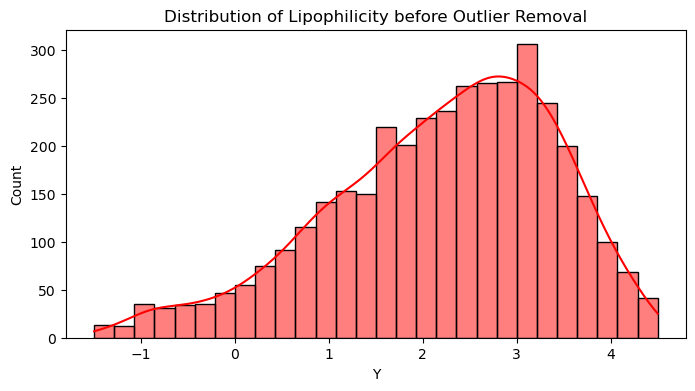

In [6]:
# create a histogram
plt.figure(figsize=(8, 4))
sns.histplot(data['Y'], kde=True, color='red')
plt.title("Distribution of Lipophilicity before Outlier Removal")

In [7]:
# identify outlier
z_scores = (data['Y'] - data['Y'].mean()) / data['Y'].std()
threshold = 3
outliers = data[abs(z_scores) > threshold]
print(outliers)

            Drug_ID                                             Drug     Y
26    CHEMBL1230668        CN(C)c1cccc2c(S(=O)(=O)N(C)CC(=O)O)cccc12 -1.45
505       CHEMBL184                         Nc1nc(O)c2ncn(COCCO)c2n1 -1.42
2402    CHEMBL25539                               CCC(CO)NCCNC(CC)CO -1.42
2571   CHEMBL218762                         O=c1[nH]c(S)nc2[nH]cnc12 -1.48
2598      CHEMBL888  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)C2(F)F)c(=O)n1 -1.50


In [8]:
# remove outlier
clean_data = data.drop(outliers.index)

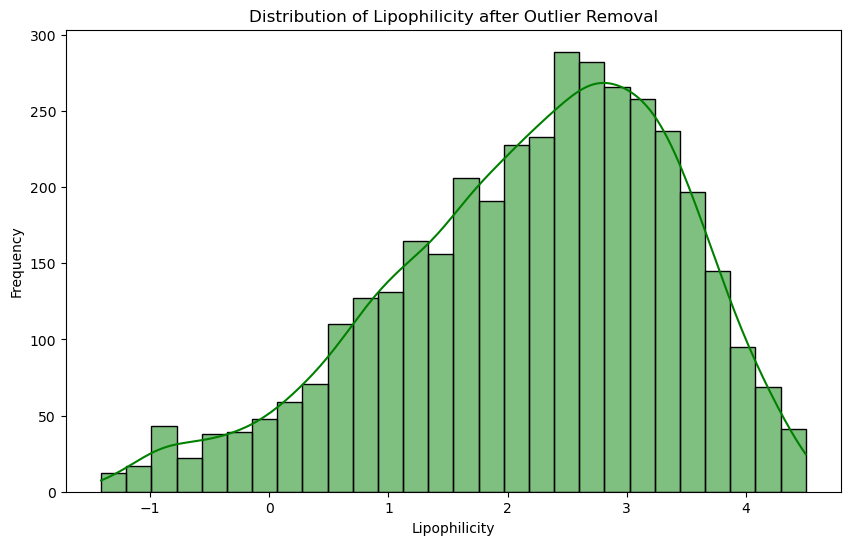

Statistics before outlier removal: count    3780.000000
mean        2.196222
std         1.204847
min        -1.500000
25%         1.410000
50%         2.370000
75%         3.100000
max         4.500000
Name: Y, dtype: float64
Statistics after outlier removal: count    3775.000000
mean        2.201057
std         1.198292
min        -1.410000
25%         1.420000
50%         2.370000
75%         3.100000
max         4.500000
Name: Y, dtype: float64


In [9]:
# data visualization
plt.figure(figsize=(10, 6))
sns.histplot(clean_data['Y'], kde=True, color='green')
plt.title("Distribution of Lipophilicity after Outlier Removal")
plt.xlabel("Lipophilicity")
plt.ylabel("Frequency")
plt.show()

# descrıptipve statistics
stats_before = data['Y'].describe()
stats_after = clean_data['Y'].describe()
print("Statistics before outlier removal:", stats_before)
print("Statistics after outlier removal:", stats_after)

## Feature Engineering

In [11]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [12]:
# enable computational chemistry and cheminformatics tasks
from rdkit import Chem
from rdkit.Chem import Descriptors

In [13]:
# compute molecular descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    descriptors = {
         "logP": Descriptors.MolLogP(mol),  # Menghitung LogP
         "HeavyAtomCount": mol.GetNumHeavyAtoms(),  # Menghitung HeavyAtomCount
         "molwt": Descriptors.MolWt(mol),  # Menghitung MolWt
         "TPSA": Descriptors.TPSA(mol) # menghitung TPSA
    }
    return descriptors

X_descriptors = clean_data['Drug'].apply(calculate_descriptors).apply(pd.Series)

new_X = X_descriptors

In [14]:
# extract the target variable
y = clean_data['Y']

In [15]:
# show molecular descriptors (new_X) and the target variable (y)
print(pd.concat([new_X, y], axis=1))

         logP  HeavyAtomCount    molwt    TPSA     Y
0     1.59610            26.0  374.466   98.41  1.35
1     3.59228            33.0  440.551   98.28  1.14
2     4.18470            29.0  393.439   89.54  2.60
3     2.69660            34.0  480.590  100.33  2.35
4     3.69272            28.0  375.428   75.44  2.36
...       ...             ...      ...     ...   ...
3775  3.33390            18.0  282.752   51.22  2.38
3776  2.01760            11.0  168.196   38.91  2.20
3777  5.44640            31.0  421.560   38.13  3.60
3778  2.88562            26.0  366.808   72.68  0.20
3779  2.81470            23.0  305.381   60.91  3.80

[3775 rows x 5 columns]


In [16]:
# data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=42)

## Regression Algorithm Selection

In [17]:
# load regression model
from sklearn.ensemble import RandomForestRegressor

## Training

In [18]:
# initialize a Random Forest Regressor model
model = RandomForestRegressor()

#initialize Random Forest Regressor model to the training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [19]:
# load hyperparameter
from sklearn.model_selection import GridSearchCV

In [20]:
# grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [21]:
# initialize a grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [22]:
# execute the grid search process
grid_search.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
308 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\util

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [23]:
# print out the best set of hyperparameters
print("Hyperparameter terbaik:", grid_search.best_params_)

Hyperparameter terbaik: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [24]:
# assigns the best model
best_model = grid_search.best_estimator_

In [25]:
# make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

## Evaluation

In [32]:
# calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 0.909219149851431
Root Mean Squared Error (RMSE): 0.953529836896272
Mean Absolute Error (MAE): 0.7316036375645447
R-squared (R2) Score: 0.4136077336410183


## save model

In [27]:
import joblib

In [28]:
joblib.dump(best_model, 'Lipophilicity_Prediction_Model.pkl')

['Lipophilicity_Prediction_Model.pkl']